In [1]:
import scanpy as sc
import scvelo as scv
import pandas as pd

In [2]:
adata = sc.read('../../../../../../../media/spencer/Extra HDD/fits/latentvelo_immune_50.h5ad')

In [3]:
meta = pd.read_csv('../../../../../../../media/spencer/Seagate Backup Plus Drive/scRNAseq/lung/raw_c2/immune_metadata.csv',
                  index_col=0)

adata.obs['cell_type_num'] = meta['cell_type_Aug']

In [4]:
adata.obs['cell_type'] = adata.obs['cell_type'].astype('category')
adata.obs['cell_type_num'] = adata.obs['cell_type_num'].astype('category')

adata.obs['cell_type'] = adata.obs['cell_type'].cat.rename_categories({'Pro-inflammatory aM1 cells': 'aM1 cells',
                      'Anti-inflammatory aM2 cells': 'aM2 cells',
                     'Monocyte/Neutrophil precursor cells':'Monocyte/Macrophage precursor cells'})

adata.obs['cell_type_num'] = adata.obs['cell_type_num'].cat.rename_categories({'Pro-inflammatory aM1 cells (3)': 'aM1 cells (3)',
                      'Anti-inflammatory aM2 cells (7)': 'aM2 cells (7)',
                     'Monocyte/Neutrophil precursor cells (10)':'Monocyte/Macrophage precursor cells (10)'})

adata.obs['cell_type'] = adata.obs['cell_type'].astype('category')
adata.obs['cell_type_num'] = adata.obs['cell_type_num'].astype('category')

In [5]:
adata.obs['cell_type_num'] = adata.obs['cell_type_num'].cat.rename_categories({'Cycling B cells (15)': 'Cycling B cells (14)',
                                                                      'Cycling lymphoctyes (16)': 'Cycling lymphoctyes (15)',
                                                                    'FLT3+ preDC (18)': 'FLT3+ preDC (17)',
                                                                          'Immature DP leukocytes (17)':'Immature DP leukocytes (16)',
                                                                              'pDC (19)':'pDC (18)'})

adata.obs['cell_type'] = adata.obs['cell_type'].astype('category')
adata.obs['cell_type_num'] = adata.obs['cell_type_num'].astype('category')

In [6]:
immune_colors_num = {'aM2 cells (7)':'#1f77b4', 'B-cells (8)':'#ff7f0e', 'CD1C+ DC (11)':'#2ca02c', 
                     'Common lymphoid progenitor (CLP) (1)':'#d62728', 'Cycling B cells (14)':'#9467bd', 
                     'Cycling lymphoctyes (15)':'#8c564b', 'FLT3+ preDC (17)':'#e377c2', 'IL7R+ T cells (5)':'#7f7f7f', 
                     'Immature DP leukocytes (16)':'#bcbd22', 'Macrophage (9)':'#17becf', 'Monocyte 1 (2)':'#aec7e8', 
                     'Monocyte 2 (12)':'#ffbb78', 'Monocyte/Macrophage precursor cells (10)':'#98df8a', 
                     'Plasma cell (13)':'#ff9896', 'aM1 cells (3)':'#c5b0d5', 
                     'Proliferating macrophage/monocyte cells (6)':'#c49c94',
                     'aM-like cells (4)':'#f7b6d2', 'pDC (18)':'#c7c7c7'} 

saving figure to file figures/latentvelo_immune_velocity.png


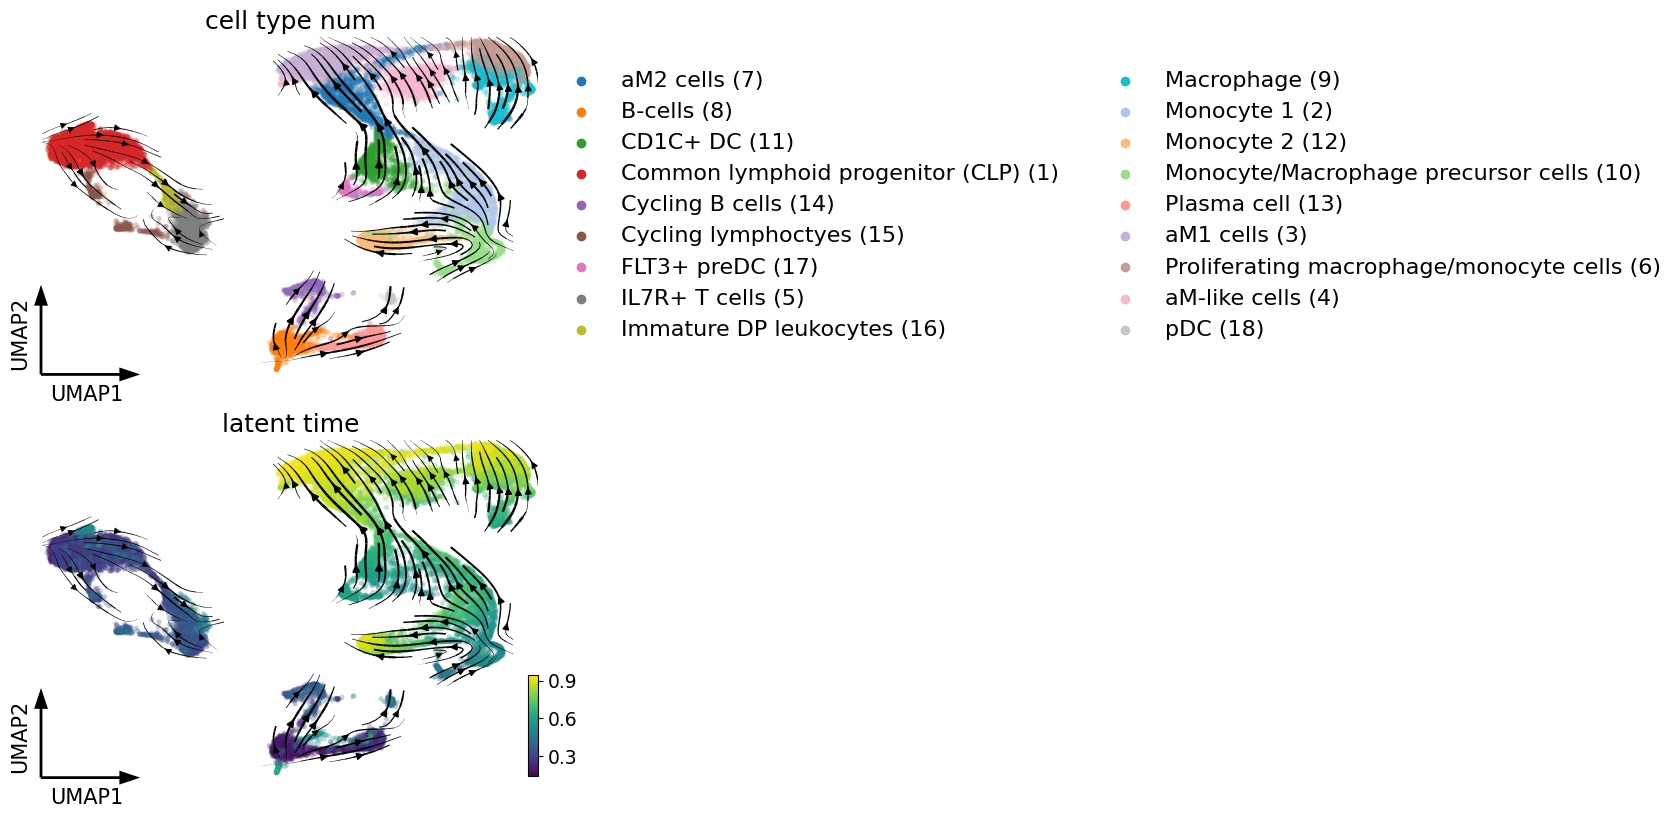

In [7]:
scv.pl.velocity_embedding_stream(adata, vkey='spliced_velocity', 
                                 color=['cell_type_num', 'latent_time'], frameon='artist', fontsize=18,
                                cutoff_perc=0, legend_loc='right', legend_fontsize=16,
                                 palette=immune_colors_num,
                                 ncols=1, save='figures/latentvelo_immune_velocity.png')

In [8]:
scv.tl.paga(adata, vkey='spliced_velocity', 
            use_time_prior='latent_time', groups='cell_type',
           minimum_spanning_tree=False)

running PAGA using priors: ['latent_time']
    finished (0:00:06) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


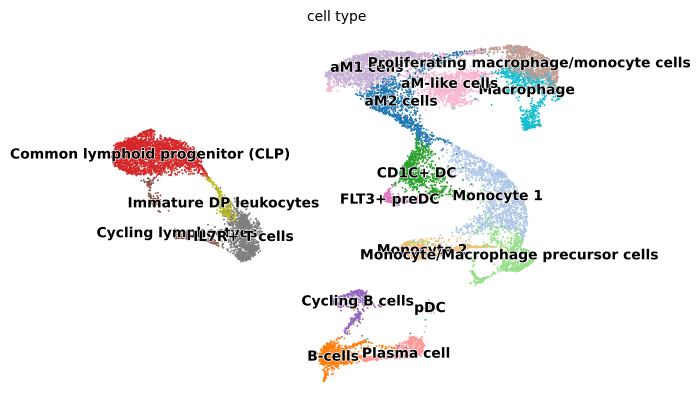

In [9]:
immune_colors =  {'aM2 cells':'#1f77b4', 'B-cells':'#ff7f0e', 'CD1C+ DC':'#2ca02c', 'Common lymphoid progenitor (CLP)':'#d62728', 'Cycling B cells':'#9467bd', 'Cycling lymphoctyes':'#8c564b', 'FLT3+ preDC':'#e377c2', 'IL7R+ T cells':'#7f7f7f', 'Immature DP leukocytes':'#bcbd22', 'Macrophage':'#17becf', 'Monocyte 1':'#aec7e8', 'Monocyte 2':'#ffbb78', 'Monocyte/Macrophage precursor cells':'#98df8a', 'Plasma cell':'#ff9896', 'aM1 cells':'#c5b0d5', 'Proliferating macrophage/monocyte cells':'#c49c94', 'aM-like cells':'#f7b6d2', 'pDC':'#c7c7c7'} 
scv.pl.umap(adata, color='cell_type', palette = immune_colors)

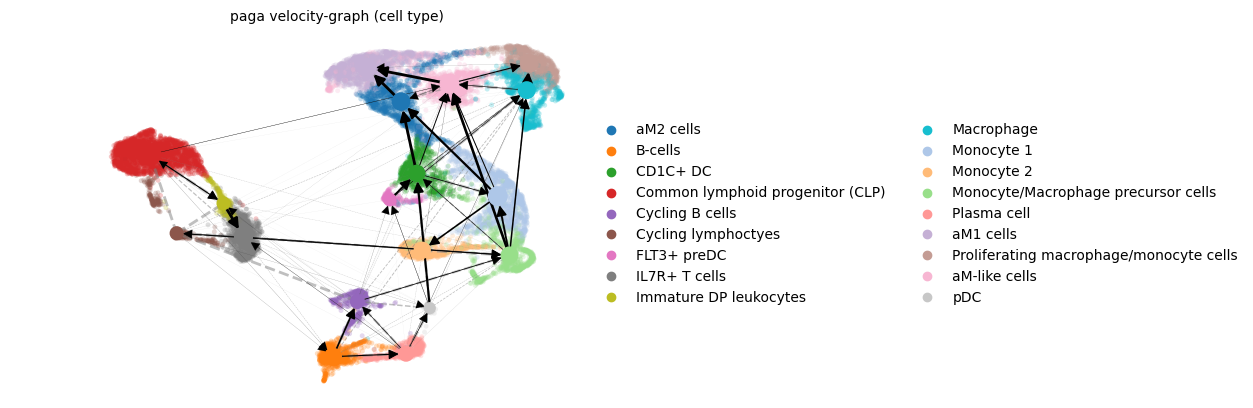

In [10]:
scv.pl.paga(adata, size=50, alpha=.25, basis='umap')

In [11]:
import numpy as np
pos = []
for ct in adata.obs.cell_type_num.cat.categories:
    X_emb = np.array(adata[adata.obs['cell_type_num']==ct].obsm['X_umap'])
    pos.append(np.median(X_emb, axis=0))
    print(pos[-1], ct)
pos =np.array(pos)

[1.46616133 5.50294662] aM2 cells (7)
[ -1.78910402 -13.69235491] B-cells (8)
[2.21669384 0.09722923] CD1C+ DC (11)
[-10.54244045   1.51544405] Common lymphoid progenitor (CLP) (1)
[-0.61958618 -9.54066252] Cycling B cells (14)
[-9.26977352 -4.40521931] Cycling lymphoctyes (15)
[ 0.9290522  -1.87807964] FLT3+ preDC (17)
[-6.07358507 -4.68480801] IL7R+ T cells (5)
[-7.03455595 -2.15875422] Immature DP leukocytes (16)
[7.4812431  6.36211706] Macrophage (9)
[ 6.09444996 -1.6144424 ] Monocyte 1 (2)
[ 2.47934815 -5.68850254] Monocyte 2 (12)
[ 6.65345904 -6.06612419] Monocyte/Macrophage precursor cells (10)
[  1.70602604 -13.4687488 ] Plasma cell (13)
[-0.16920364  8.04822708] aM1 cells (3)
[7.60221287 8.38574911] Proliferating macrophage/monocyte cells (6)
[3.77947184 6.83839012] aM-like cells (4)
[  2.8466725  -10.03678106] pDC (18)


In [12]:
pos[11][0] = 1.5

[1.46616133 5.50294662] [1.46616133 5.50294662]
[ -1.78910402 -13.69235491] [ -1.78910402 -13.69235491]
[2.21669384 0.09722923] [2.21669384 0.09722923]
[-10.54244045   1.51544405] [-10.54244045   1.51544405]
[-0.61958618 -9.54066252] [-0.61958618 -9.54066252]
[-9.26977352 -4.40521931] [-9.26977352 -4.40521931]
[ 0.9290522  -1.87807964] [ 0.9290522  -1.87807964]
[-6.07358507 -4.68480801] [-6.07358507 -4.68480801]
[-7.03455595 -2.15875422] [-7.03455595 -2.15875422]
[7.4812431  6.36211706] [7.4812431  6.36211706]
[ 6.09444996 -1.6144424 ] [ 6.09444996 -1.6144424 ]
[ 2.47934815 -5.68850254] [ 1.5        -5.68850254]
[ 6.65345904 -6.06612419] [ 6.65345904 -6.06612419]
[  1.70602604 -13.4687488 ] [  1.70602604 -13.4687488 ]
[-0.16920364  8.04822708] [-0.16920364  8.04822708]
[7.60221287 8.38574911] [7.60221287 8.38574911]
[3.77947184 6.83839012] [3.77947184 6.83839012]
[  2.8466725  -10.03678106] [  2.8466725  -10.03678106]
saving figure to file figures/latentvelo_immune_PAGA.pdf


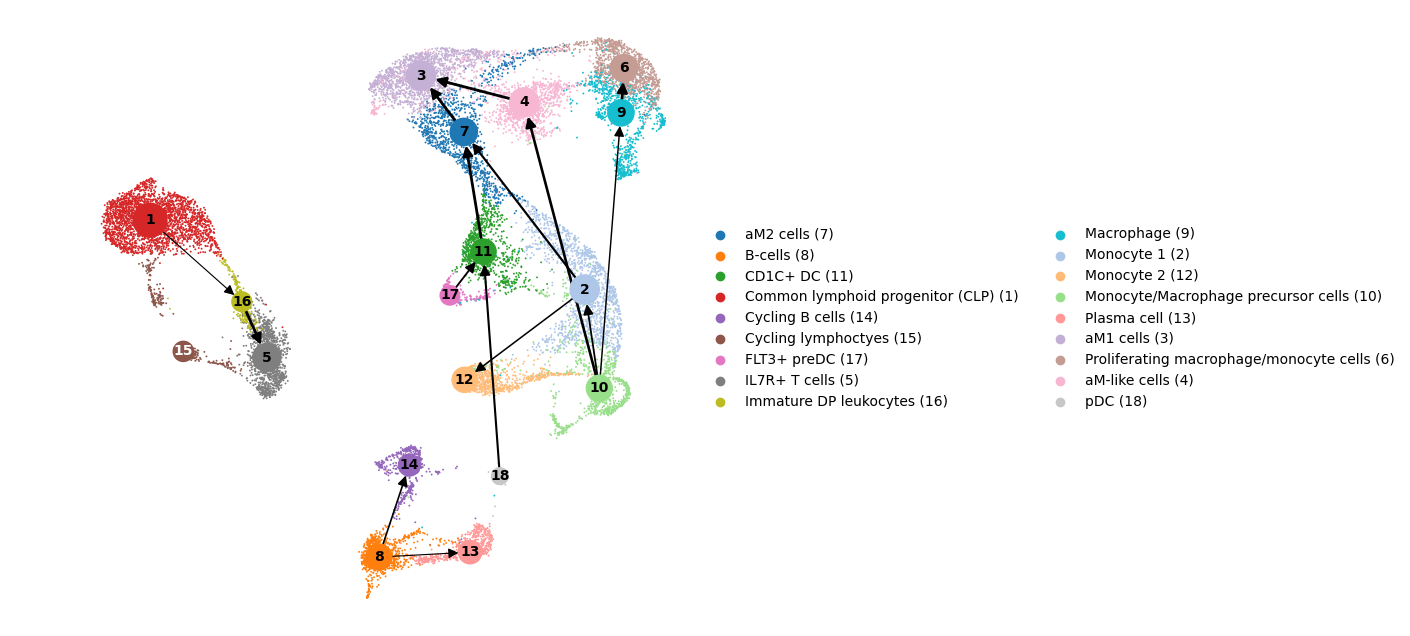

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots(figsize=(8,8))
scv.pl.paga(adata, size=50, alpha=.25, pos=pos,
            edge_scale_width=0.75, title='',
            min_edge_width=0, node_size_scale=2.5, threshold=0.25,
           dashed_edges = None, ax=ax, show=False)


for i_,ct in enumerate(adata.obs.cell_type_num.cat.categories):
    X_emb = np.array(adata[adata.obs['cell_type_num']==ct].obsm['X_umap'])
    x_pos, y_pos = pos[i_] 
    print(np.median(X_emb, axis=0), pos[i_])
    label = ct[-4:].split('(')[1].split(')')[0]
    if label == '15':
        ax.text(x_pos, y_pos, str(label), zorder=10000, horizontalalignment='center', verticalalignment='center',
               color='white',fontweight='bold')
    else:
        ax.text(x_pos, y_pos, str(label), zorder=10000, horizontalalignment='center', 
                verticalalignment='center',fontweight='bold')

scv.pl.umap(adata, color='cell_type_num', ax=ax, legend_loc='right',title='',
           save='figures/latentvelo_immune_PAGA.pdf')

plt.show()

In [14]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()#figsize=(8,8))

pos = adata.uns['paga']['pos']

for i,ct in enumerate(adata.obs.cell_type_num.cat.categories):
    X_emb = np.array(adata[adata.obs['cell_type_num']==ct].obsm['X_umap'])
    x_pos, y_pos = pos[i]
    label = ct[-4:].split('(')[1].split(')')[0]
    if label == '15':
        ax.text(x_pos, y_pos, str(label), zorder=10000, horizontalalignment='center', verticalalignment='center',
               color='white',fontweight='bold')
    else:
        ax.text(x_pos, y_pos, str(label), zorder=10000, horizontalalignment='center', 
                verticalalignment='center',fontweight='bold')
        
scv.pl.velocity_embedding_stream(adata, vkey='spliced_velocity', cutoff_perc=0, show=False,
                                 color='cell_type_num', ax=ax, legend_loc='right', palette=immune_colors_num,
            title='')

scv.pl.paga(adata, size=100, alpha=.25, pos=pos, arrowsize=0,#
            edge_scale_width=0,solid_edges=None,max_edge_width=0,title='',
            min_edge_width=0, node_size_scale=1, threshold=0.045,
           dashed_edges = None, ax=ax, show=False,palette =immune_colors_num, zorder=1000000000,
           save='figures/latentvelo_immune_velocity.svg', dpi=60)

plt.show()

saving figure to file figures/latentvelo_immune_velocity.svg


In [15]:
pd.DataFrame(adata.uns['paga']['transitions_confidence'].todense(),index=adata.obs.cell_type_num.cat.categories, 
             columns=adata.obs.cell_type_num.cat.categories).to_csv('data/Immune_PAGA.csv')